In [1]:
import os
directory = '/kaggle/input'

## Data Generator

In [2]:
import torch
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

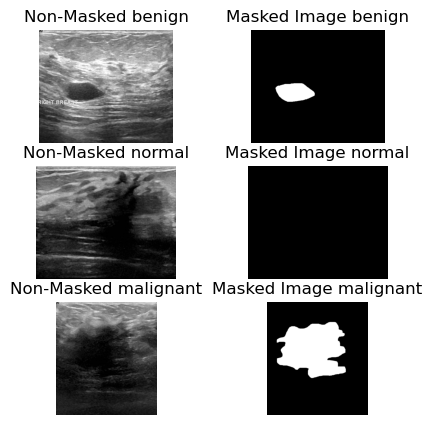

In [3]:
fig, axes = plt.subplots(3, 2, figsize=(5, 5))
itr = 0
for root, dirs, filenames in os.walk(directory):
    img_c = 0
    for file in filenames:
        #print(img_c)
        if img_c == 0:
            pass
        else:
            #print(temp.split('.')[0]+'_mask.png')
            if temp.split('.')[0]+'_mask' in file:
                file_path = os.path.join(root, file)
                #print(file_path)
                image = Image.open(file_path)
                axes[itr][img_c].imshow(image, cmap='gray')  
                axes[itr][img_c].set_title(f"Masked Image {file.split(' ')[0]}")
                axes[itr][img_c].axis('off')
                itr = itr + 1
                break
        if 'mask' not in file:
            if img_c > 0:
                continue
            temp = file
            file_path = os.path.join(root, file)
            #print(file_path)
            image = Image.open(file_path)
            axes[itr][img_c].imshow(image, cmap='gray')  
            axes[itr][img_c].set_title(f"Non-Masked {file.split(' ')[0]}")
            axes[itr][img_c].axis('off')
            img_c = img_c + 1
            #print(img_c, itr)

In [4]:
'''transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])'''

'transform = transforms.Compose([\n    transforms.Resize((224, 224)),\n    transforms.ToTensor(),\n    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),\n])'

benign (2).png
benign (2)_mask.png
normal (28).png
normal (28)_mask.png
malignant (71).png
malignant (71)_mask.png


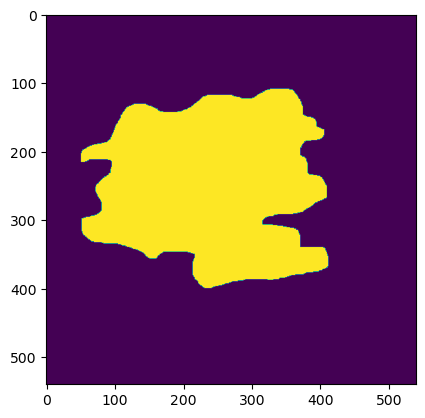

In [5]:
for root, dirs, filenames in os.walk(directory):
    for file in filenames:
        if 'mask' not in file:
            file_path = os.path.join(root, file)
            print(file)
            blank_image = Image.new('L', (540, 540), 0)
            for masked_file in filenames:
                if file.split('.')[0]+'_' in masked_file:
                    print(masked_file)
                    masked_file_path = os.path.join(root, masked_file)
                    image_to_paste = Image.open(masked_file_path)
                    blank_image.paste(image_to_paste)
        break
plt.imshow(blank_image)

benign (100)_mask_1.png


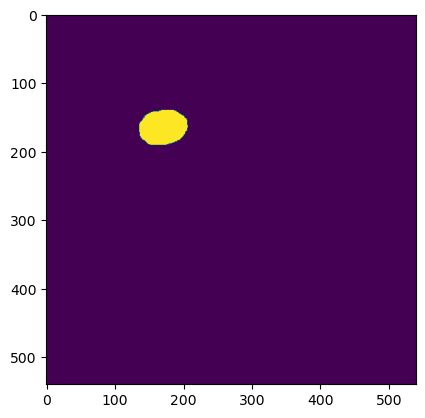

benign (100)_mask.png


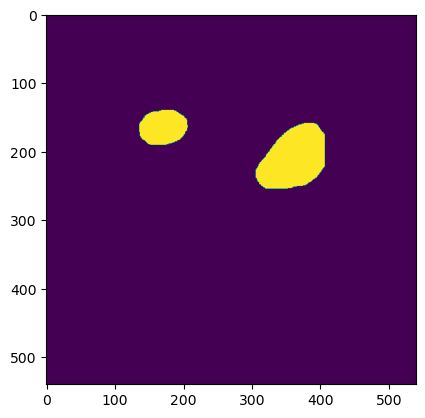

In [6]:
file_path = "/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (100).png"
file = 'benign (100).png'
blank_image = Image.new('L', (540, 540), 0)
for masked_file in os.listdir('/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign'):
    if file.split('.')[0]+'_' in masked_file:
        print(masked_file)
        masked_file_path = os.path.join('/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign', masked_file)
        image_to_paste = Image.open(masked_file_path)
        x_offset = (540 - image_to_paste.width) // 2
        y_offset = (540- image_to_paste.height) // 2
        blank_image.paste(image_to_paste, (x_offset, y_offset), image_to_paste)
        plt.imshow(blank_image)
        plt.show();